In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
path = r'D:\DATA SCIENCE\14. Project - Case Study (Part - I)\startup_funding.csv'

In [269]:
df = pd.read_csv(path)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Question

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [270]:
test1 = df.copy()

## Check For Null Values

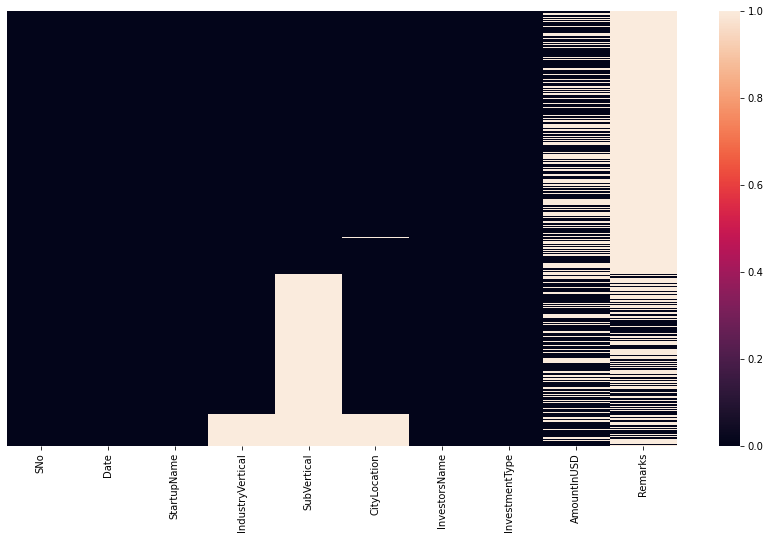

In [271]:
plt.figure(figsize=(15,8))
sns.heatmap(test1.isnull(),yticklabels=False)
plt.show()

In [272]:
#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)

In [273]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [274]:
#replacing the wrong written city
test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [275]:
#filtering city
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)

In [276]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]

In [277]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()# gives a pandas series for unique city with index as city name and value as their counts
city = temp.index
No_Of_Funding = temp.values

In [278]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


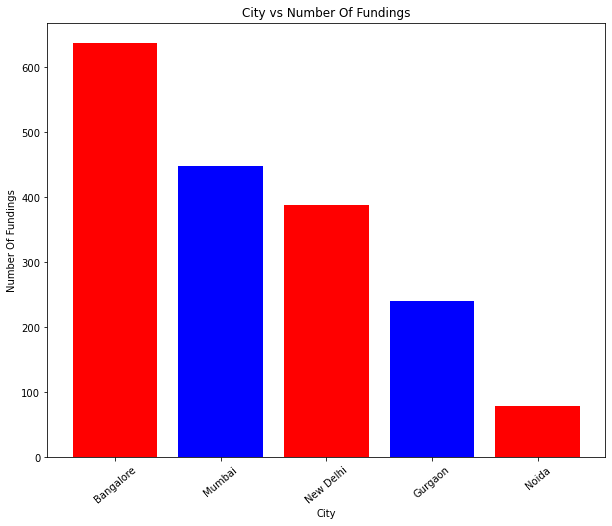

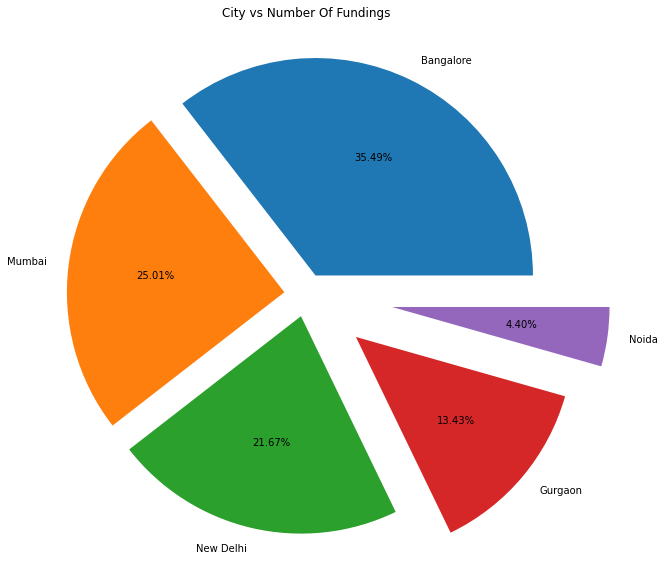

In [279]:
#bar Graph
plt.figure(figsize=(10,8))
plt.bar(city, No_Of_Funding, color = ['Red',"blue"], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
#pie chart
plt.figure(figsize=(10,10))
plt.pie(No_Of_Funding,labels=city,autopct="%.2f%%",explode=[0.1,0.1,0.1,0.3,0.4])
plt.title("City vs Number Of Fundings")
plt.show()

### Question

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup.There are some spelling mistakes in Investors somewhere investors is written. Ignore undisclosed investors.

In [280]:
test2 = df.copy()

In [281]:
#correcting the spelling in investors name and ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [282]:
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

In [283]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1         
    return d

In [284]:
dictionary1 = build_dict(test2['InvestorsName'])

#build pandas dataframe of investors name and its number of investments
dic_val_1 = list(dictionary1.values())
dic_key_1 = list(dictionary1.keys())
dict1={0: dic_key_1, 1: dic_val_1}
invest = pd.DataFrame(dict1)

In [285]:
#sort the values in descending order 
invest = invest.sort_values(by = [1], ascending = False)

In [286]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.values[i][0])
    y.append(invest.values[i][1])

In [287]:
#printing the top investors
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for investors in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(investors)
    i += 1

List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. SAIF Partners
5. Indian Angel Network


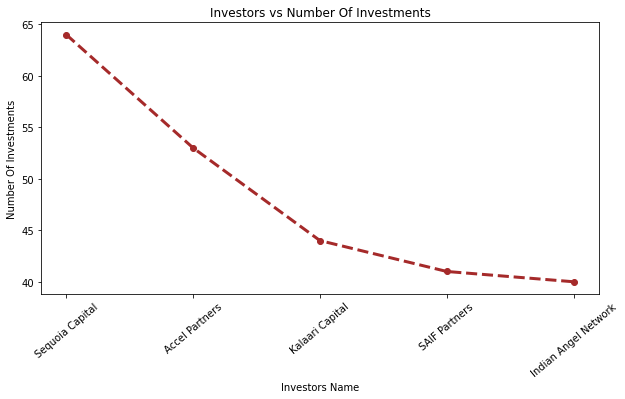

In [288]:
#plot the plot line
plt.figure(figsize=(10,5))
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o')
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()

### Question

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [289]:
test3 = df.copy()

In [290]:
#correcting the spelling in investors name as ignoring the undisclosed investors
test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

In [291]:
#correcting major startup names
test3['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test3['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test3['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test3['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Olacabs", "Ola", inplace = True)
test3['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test3['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [292]:
#correcting spelling of investment type
test3['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test3['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test3['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [293]:
#filter na 
test3.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test3.reset_index(inplace = True, drop = True)

In [294]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i] = li  
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt


In [295]:
#making dictionary to keep record of every investor
dictionary2 = Create(test3['StartupName'], test3['InvestorsName'], test3['InvestmentType'], ["Crowd Funding", "Seed Funding"])

In [296]:
#build pandas dataframe
dic_val_2 = list(dictionary2.values())
dic_key_2 = list(dictionary2.keys())
dict2={0: dic_key_2, 1: dic_val_2}
diff_invest_type = pd.DataFrame(dict2)

In [297]:
#sort in descending order on the basis of values
diff_invest_type = diff_invest_type.sort_values(by = [1], ascending = False)

In [298]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(diff_invest_type.values[i][0])
    y.append(diff_invest_type.values[i][1])

In [299]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is either Seed funding or Crowd funding
print("List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :
1. Indian Angel Network
2. Rajan Anandan
3. LetsVenture
4. Anupam Mittal
5. Group of Angel Investors


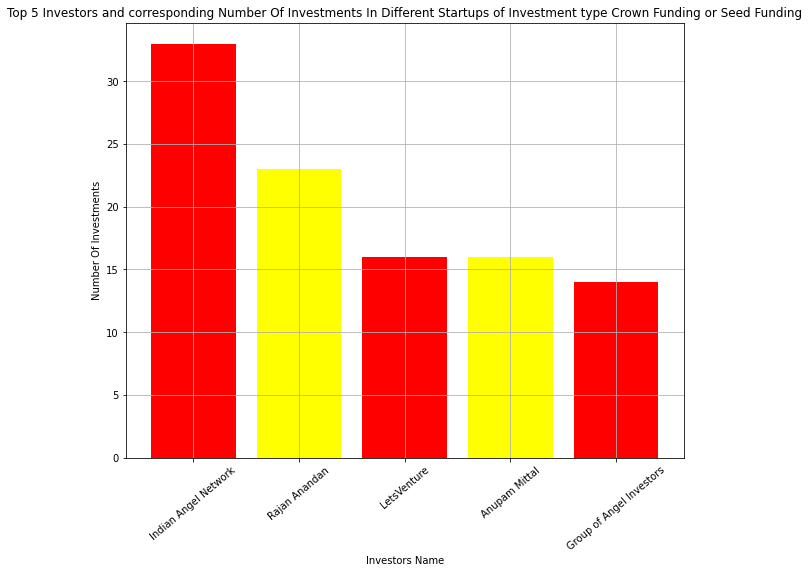

In [300]:
#plot
plt.figure(figsize=(10,8))
plt.bar( x, y, color = ['red', 'yellow'])
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Crown Funding or Seed Funding")
plt.show()

### Question

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

In [301]:
test4 = df.copy()

In [302]:
#correcting the spelling in investors name as ignoring the undisclosed investors
test4['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test4['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

In [303]:
#correcting major startup names
test4['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test4['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test4['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test4['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Olacabs", "Ola", inplace = True)
test4['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test4['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [304]:
#correcting spelling of investment type
test4['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test4['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test4['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [305]:
#filter na 
test4.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test4.reset_index(inplace = True, drop = True)

In [306]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i] = li
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [307]:
#making dictionary to keep record of every investor
dictionary3 = Create(test4['StartupName'], test4['InvestorsName'], test4['InvestmentType'], ["Private Equity"])

In [308]:
#build pandas dataframe
dic_val_3 = list(dictionary3.values())
dic_key_3 = list(dictionary3.keys())
dict3={0: dic_key_3, 1: dic_val_3}
diff_invest_type = pd.DataFrame(dict3)

In [309]:
#sort in descending order on the basis of values
diff_invest_type = diff_invest_type.sort_values(by = [1], ascending = False)

In [310]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(diff_invest_type.values[i][0])
    y.append(diff_invest_type.values[i][1])

In [311]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is Private Equity
print("List Of Top 5 Investors who Invested most number of times of type Private Equity:")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Private Equity:
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


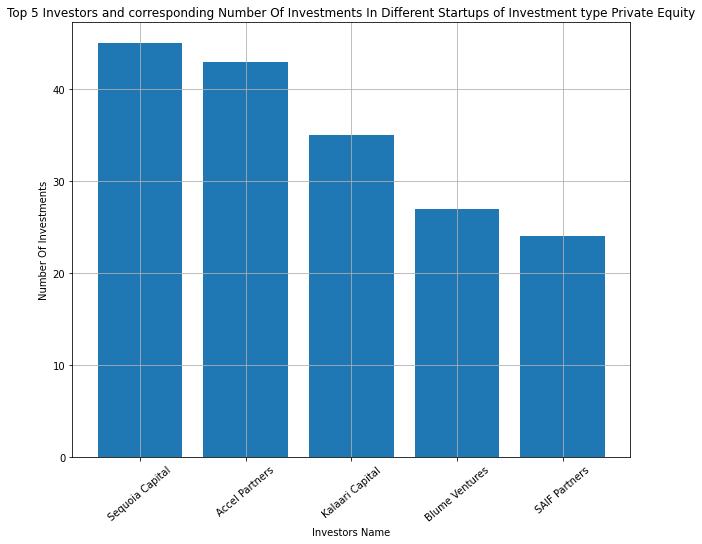

In [312]:
#plot
plt.figure(figsize=(10,8))
plt.bar(x, y)
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Private Equity")
plt.show()